In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [2]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
#
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
#
# pip install

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold, StratifiedShuffleSplit, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from tqdm import tqdm
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
import category_encoders as ce

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import Lars
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from IPython.display import Image

import category_encoders as ce
from sklearn.preprocessing import FunctionTransformer

from sklearn.model_selection import ShuffleSplit

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.feature_selection  import RFE
from sklearn.decomposition import PCA
import math

### Область работы 2 (поиск  модели .... )

In [2]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВЫЙ НАБОР
#
# Путь к тренировочному набору
# 

path_train = 'train.csv' # содержит только имя файла, без имен папок !!!

In [3]:
df = pd.read_csv(path_train)
display(df.info())
display(df.describe())
display(df[df.eq(0).any(axis=1)])
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   wage        400 non-null    float64
 1   education   400 non-null    int64  
 2   experience  400 non-null    int64  
 3   age         400 non-null    int64  
 4   ethnicity   400 non-null    object 
 5   region      400 non-null    object 
 6   gender      400 non-null    object 
 7   occupation  400 non-null    object 
 8   sector      400 non-null    object 
 9   union       400 non-null    object 
 10  married     400 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 34.5+ KB


None

,wage,education,experience,age
count,400.000000,400.000000,400.000000,400.000000
mean,9.078150,12.960000,17.860000,36.810000
std,5.274194,2.694727,12.474953,11.840159
min,1.000000,2.000000,0.000000,18.000000
25%,5.240000,12.000000,8.000000,28.000000
50%,7.670000,12.000000,15.000000,35.000000
75%,11.327500,14.250000,26.000000,44.000000
max,44.500000,18.000000,55.000000,64.000000


,wage,education,experience,age,ethnicity,region,gender,occupation,sector,union,married
44,4.50,13,0,19,cauc,south,female,office,other,no,no
76,10.00,16,0,18,cauc,other,female,technical,other,no,no
83,5.00,12,0,18,cauc,other,female,office,other,no,no
130,4.00,13,0,19,cauc,other,male,worker,other,no,no
138,5.00,14,0,20,hispanic,other,male,sales,other,no,no
169,4.25,13,0,19,cauc,south,female,office,other,no,no
200,2.01,13,0,19,cauc,south,male,services,other,no,no
238,5.00,14,0,20,cauc,other,male,technical,construction,no,yes
354,3.35,12,0,18,cauc,other,male,worker,other,no,no
392,3.35,12,0,18,cauc,other,female,services,other,no,no


wage          0
education     0
experience    0
age           0
ethnicity     0
region        0
gender        0
occupation    0
sector        0
union         0
married       0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df

,wage,education,experience,age,ethnicity,region,gender,occupation,sector,union,married
0,8.50,12,16,34,cauc,other,female,technical,other,no,no
1,10.00,14,22,42,cauc,other,male,technical,other,no,yes
2,24.98,16,18,40,cauc,other,male,management,other,no,yes
3,4.50,12,3,21,cauc,other,female,management,other,no,yes
4,8.00,12,8,26,cauc,other,female,office,other,no,no
...,...,...,...,...,...,...,...,...,...,...,...
395,10.00,16,7,29,hispanic,other,male,management,other,yes,yes
396,6.75,10,13,29,cauc,other,male,worker,manufacturing,no,yes
397,9.00,16,7,29,other,other,male,management,other,no,yes
398,9.57,12,5,23,cauc,other,female,services,other,yes,yes


In [6]:
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"Уникальные элементы колонки {col}: {unique_vals}")

Уникальные элементы колонки wage: [ 8.5  10.   24.98  4.5   8.    5.5   5.   14.21 11.25  3.5   3.95  8.89
 11.11  9.25  6.5   7.78  3.    3.8   1.    9.33 16.65 16.   12.    6.
  5.75  8.8   3.35  8.2   4.17 20.    8.63  4.75  3.56  8.56  9.6   6.75
  9.    5.71  9.37 25.    3.4  15.    5.56  5.21  5.3  10.43 22.83  4.8
  4.35  8.99  5.26  5.4  12.5   5.25  6.67  6.73 13.95  9.75  7.5  12.16
 13.12  9.63 10.67  6.58  6.25 19.    7.   12.22 12.05 13.71  8.93  6.85
  6.1  13.26  8.4   4.   10.58  7.3  12.67  9.1  20.4   8.49  4.85  5.2
  8.43  6.88  6.4  10.78  6.28  3.84 11.79 18.16  3.64  3.51 13.2  16.42
  9.5  13.45 16.26  4.84  4.25  3.75  9.42 12.65 10.2   3.6   8.75  5.85
 13.98  7.45 10.62  5.35  9.83 19.98 22.2   5.95 10.25  2.01 11.5   9.56
  2.85  9.22  5.62  5.65 13.   14.67  7.14 21.25 11.36 11.71 10.5   7.65
 18.5   4.55 12.57  9.17 11.32  4.45 19.38 11.84  5.87  4.59  3.65  5.8
 13.89 16.14 10.28 18.   11.   22.   14.    6.94  9.86 12.2  11.43  7.7
  8.9   5.13 26.29  4.2

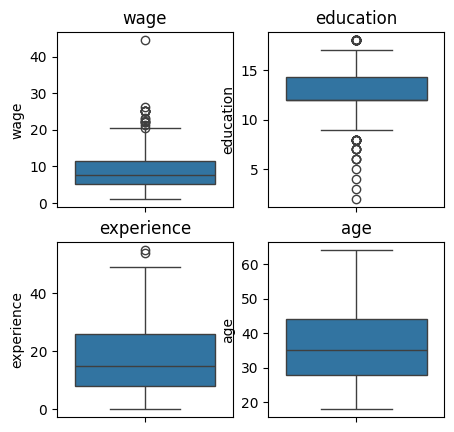

In [7]:
col_nums = 2  # how many plots per row
row_nums = math.ceil(len(df.select_dtypes(include=[np.number]).columns) / col_nums)  # how many rows of plots
# print(col_nums, row_nums)
_, axes = plt.subplots(nrows=row_nums, ncols=col_nums, figsize=(5,5))
for i, col in enumerate(df.select_dtypes(include=[np.number]).columns):
    sns.boxplot(data=df[col], ax=axes.flatten()[i]).set_title(col)
plt.show()

array([[<Axes: title={'center': 'wage'}>,
        <Axes: title={'center': 'education'}>],
       [<Axes: title={'center': 'experience'}>,
        <Axes: title={'center': 'age'}>]], dtype=object)

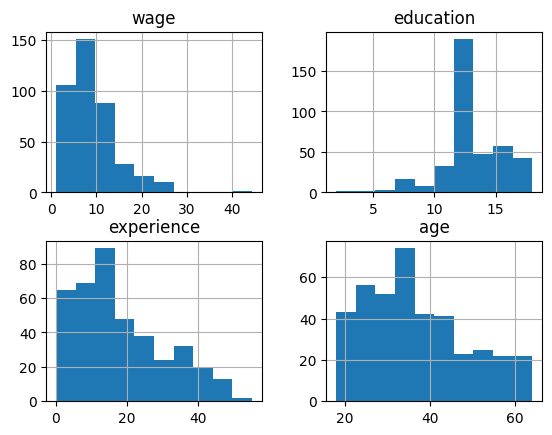

In [8]:
df.hist()

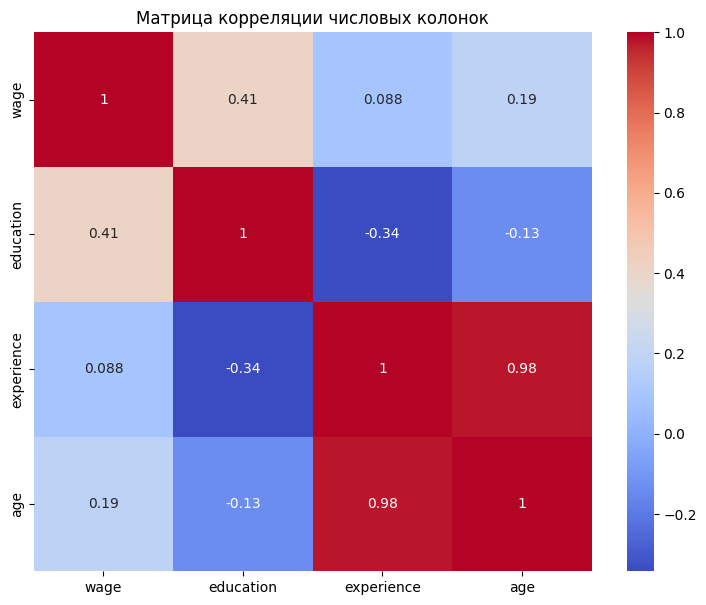

In [9]:
# Отбираем только числовые колонки
numeric_df = df.select_dtypes(include=['number'])

# Считаем матрицу корреляции
corr_matrix = numeric_df.corr()

# Строим тепловую карту
plt.figure(figsize=(9, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Добавляем заголовок
plt.title('Матрица корреляции числовых колонок')

# Отображаем график
plt.show()

In [10]:
X = df.drop(['wage'],axis=1)
y = df['wage']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle = True)
X_train

,education,experience,age,ethnicity,region,gender,occupation,sector,union,married
85,12,8,26,cauc,other,male,worker,other,no,yes
207,10,44,60,cauc,other,female,worker,manufacturing,yes,no
309,12,35,53,other,other,male,worker,construction,yes,yes
155,10,37,53,other,south,female,services,other,no,yes
268,12,30,48,cauc,other,male,technical,other,no,yes
...,...,...,...,...,...,...,...,...,...,...
36,12,18,36,other,other,female,office,other,no,yes
48,18,3,27,cauc,other,male,technical,other,no,yes
302,14,13,33,cauc,other,male,worker,other,no,no
197,14,26,46,cauc,other,female,management,other,no,yes


In [11]:
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns
print(categorical_features)
print(numeric_features)

Index(['ethnicity', 'region', 'gender', 'occupation', 'sector', 'union',
       'married'],
      dtype='object')
Index(['education', 'experience', 'age'], dtype='object')


In [12]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])


CT = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)
display(CT)

ct = CT.fit_transform(X_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 Index(['education', 'experience', 'age'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['ethnicity', 'region', 'gender', 'occupation', 'sector', 'union',
       'married'],
      dtype='object'))])

In [13]:
clf_list = [KNeighborsRegressor(),  RandomForestRegressor(), GradientBoostingRegressor(), ExtraTreesRegressor(), DecisionTreeRegressor()]
cv_list = []
for clf in clf_list:
    pipe = Pipeline([('preprocessing', CT),
                ('classifier', clf)])
    #pipe.fit(X_train, y_train)
    cv_results = cross_validate(pipe, X_train, y_train, cv=10, scoring ="neg_mean_squared_error", n_jobs = -1)
    cv_list.append(cv_results['test_score'])
cv_df = pd.DataFrame(np.array(cv_list).T)
cv_df.columns = [str(i) for i in clf_list]
display(cv_df)
# Вычисление средних значений и преобразование в MSE
cv_df_mean = (-cv_df).mean()  # Преобразуем отрицательное MSE в положительное
# Стандартное отклонение для дополнительного анализа

# Сортируем по наименьшему среднему MSE
sorted_results = cv_df_mean.sort_values()

print("Среднее MSE для каждой модели:")
print(sorted_results)


,KNeighborsRegressor(),RandomForestRegressor(),GradientBoostingRegressor(),ExtraTreesRegressor(),DecisionTreeRegressor()
0,-18.494883,-20.292580,-19.571292,-33.158527,-62.335835
1,-12.562938,-17.977733,-12.471226,-16.396871,-57.745474
2,-68.281370,-63.059005,-62.452462,-63.483066,-69.112278
3,-21.972813,-19.026399,-16.209810,-22.025858,-32.571491
4,-30.675247,-31.826108,-34.489235,-58.348818,-48.373061
5,-14.424102,-21.800191,-17.555778,-23.144574,-33.473397
6,-15.939769,-29.175098,-27.500045,-16.266306,-81.377577
7,-13.645336,-13.612937,-9.353406,-16.411171,-46.033950
8,-30.228006,-27.838545,-30.156130,-45.351631,-28.126670
9,-27.118804,-25.290468,-27.523989,-34.253669,-35.771790


Среднее MSE для каждой модели:
KNeighborsRegressor()          25.334327
GradientBoostingRegressor()    25.728337
RandomForestRegressor()        26.989906
ExtraTreesRegressor()          32.884049
DecisionTreeRegressor()        49.492152
dtype: float64


In [14]:
clf_list = [LinearRegression(),  Lasso(), Ridge(), ElasticNet(), SVR()]
cv_list = []
for clf in clf_list:
    pipe = Pipeline([('preprocessing', CT),
                ('classifier', clf)])
    #pipe.fit(X_train, y_train)
    cv_results = cross_validate(pipe, X_train, y_train, cv=10, scoring = 'neg_mean_squared_error', n_jobs = -1)
    cv_list.append(cv_results['test_score'])
cv_df = pd.DataFrame(np.array(cv_list).T)
cv_df.columns = [str(i) for i in clf_list]
display(cv_df)
# Вычисление средних значений и преобразование в MSE
cv_df_mean = (-cv_df).mean()  # Преобразуем отрицательное MSE в положительное
# Стандартное отклонение для дополнительного анализа

# Сортируем по наименьшему среднему MSE
sorted_results = cv_df_mean.sort_values()

print("Среднее MSE для каждой модели:")
print(sorted_results)


,LinearRegression(),Lasso(),Ridge(),ElasticNet(),SVR()
0,-13.936012,-19.223029,-13.959971,-19.208017,-16.842423
1,-8.633671,-15.370282,-8.694045,-14.583279,-9.475169
2,-58.400969,-61.419704,-57.846111,-61.894633,-62.910087
3,-20.464293,-26.092779,-20.432199,-25.537289,-22.322646
4,-25.466683,-36.093066,-26.114608,-34.704620,-28.879371
5,-18.787267,-18.079665,-17.777738,-18.075570,-16.706595
6,-13.331086,-13.359476,-13.197507,-13.157610,-12.461772
7,-5.620282,-15.911371,-5.679004,-15.096270,-14.393596
8,-35.340079,-32.725407,-34.952337,-31.173250,-30.597066
9,-22.480788,-23.609110,-22.472306,-23.863658,-23.408747


Среднее MSE для каждой модели:
Ridge()               22.112583
LinearRegression()    22.246113
SVR()                 23.799747
ElasticNet()          25.729419
Lasso()               26.188389
dtype: float64


лучший результат у Ridge 

## Ridge

In [15]:
# Создание модели Ridge регрессии
ridge = Ridge()

# Построение пайплайна
pipeline = Pipeline(steps=[
    ('preprocessor', CT),
    ('regressor', ridge)
])

# Определение параметров для GridSearchCV
param_grid = {
    'regressor__alpha': np.logspace(-4, 4, 50),  # Параметр регуляризации
}

# Инициализация GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

# Обучение модели
grid_search.fit(X_train, y_train)

# Вывод лучших параметров и оценки
print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучший результат (MSE): {-grid_search.best_score_}")

# Оценка модели на тестовых данных
y_pred = grid_search.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
print(f"MSE на тестовых данных: {test_mse}")

Лучшие параметры: {'regressor__alpha': 16.768329368110066}
Лучший результат (MSE): 21.858046005087388
MSE на тестовых данных: 15.22924778815933


## ElasticNet

In [16]:
# Создание модели ElasticNet
elastic_net = ElasticNet(max_iter=10000) 

# Построение пайплайна
pipeline = Pipeline(steps=[
    ('preprocessor', CT),  # Ваш ColumnTransformer (CT)
    ('regressor', elastic_net)
])

# Определение параметров для GridSearchCV
param_grid = {
    'regressor__alpha': np.logspace(-4, 4, 50),  # Диапазон для alpha
    'regressor__l1_ratio': [0.1, 0.5, 0.7, 1.0]  # Коэффициент между Lasso и Ridge
}

# Инициализация GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

# Обучение модели
grid_search.fit(X_train, y_train)

# Вывод лучших параметров и оценки
print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучший результат (MSE): {-grid_search.best_score_}")

# Оценка модели на тестовых данных
y_pred = grid_search.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
print(f"MSE на тестовых данных: {test_mse}") # результат чуть хуже 

/Users/alinaohina/Downloads/folderanaconda/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.447e+00, tolerance: 8.304e-01
  model = cd_fast.enet_coordinate_descent(
/Users/alinaohina/Downloads/folderanaconda/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.482e+02, tolerance: 8.390e-01
  model = cd_fast.enet_coordinate_descent(
/Users/alinaohina/Downloads/folderanaconda/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number o

Лучшие параметры: {'regressor__alpha': 0.05963623316594643, 'regressor__l1_ratio': 0.1}
Лучший результат (MSE): 21.86589704063805
MSE на тестовых данных: 15.20744457205634


In [68]:
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Определение трансформеров для категориальных и числовых признаков
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

CT = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Список моделей для обучения
clf_list = [
    KNeighborsRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    ExtraTreesRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge(),
    ElasticNet(),
    SVR()
]

# Словарь параметров для подбора через GridSearchCV
param_grid = {
    'KNeighborsRegressor': {'classifier__n_neighbors': [3, 5, 7, 10]},
    'RandomForestRegressor': {'classifier__n_estimators': [50, 100, 200], 'classifier__max_depth': [3, 5, 7, None]},
    'GradientBoostingRegressor': {'classifier__n_estimators': [50, 100, 200], 'classifier__learning_rate': [0.05, 0.1, 0.2]},
    'ExtraTreesRegressor': {'classifier__n_estimators': [50, 100, 200], 'classifier__max_depth': [3, 5, 7, None]},
    'DecisionTreeRegressor': {'classifier__max_depth': [3, 5, 7, None]},
    'LinearRegression': {'classifier__fit_intercept': [True, False]},
    'Lasso': {'classifier__alpha': np.logspace(-4, 4, 50)},
    'Ridge': {'classifier__alpha': np.logspace(-4, 4, 50)},
    'ElasticNet': {'classifier__alpha': np.logspace(-4, 4, 50), 'classifier__l1_ratio': [0.1, 0.5, 0.7, 1.0]},
    'SVR': {'classifier__C': np.logspace(-4, 4, 50), 'classifier__epsilon': [0.01, 0.1, 0.2, 0.3]}
}

# Массив для хранения результатов
cv_list = []

# Обучение моделей и подбор параметров
for clf in clf_list:
    model_name = clf.__class__.__name__
    pipe = Pipeline([('preprocessing', CT), ('classifier', clf)])
    
    # GridSearch для каждой модели
    grid_search = GridSearchCV(pipe, param_grid.get(model_name, {}), cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Запись лучших результатов
    cv_list.append({
        'model': model_name,
        'best_params': grid_search.best_params_,
        'best_score': -grid_search.best_score_,  # Преобразуем MSE в положительный
        'test_score': mean_squared_error(y_test, grid_search.predict(X_test))
    })

# Вывод результатов
cv_df = pd.DataFrame(cv_list)
display(cv_df)

# Сортировка моделей по лучшему результату
sorted_results = cv_df.sort_values(by='best_score')

print("Рейтинг моделей по MSE:")
print(sorted_results[['model', 'best_score', 'test_score']])

# Выбираем наилучшую модель по результатам
best_model = sorted_results.iloc[0]
print(f"Лучший классификатор: {best_model['model']}")
print(f"Лучшие параметры: {best_model['best_params']}")


/Users/alinaohina/Downloads/folderanaconda/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.068e+03, tolerance: 8.018e-01
  model = cd_fast.enet_coordinate_descent(
/Users/alinaohina/Downloads/folderanaconda/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.094e+03, tolerance: 8.006e-01
  model = cd_fast.enet_coordinate_descent(
/Users/alinaohina/Downloads/folderanaconda/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number o

,model,best_params,best_score,test_score
0,KNeighborsRegressor,{'classifier__n_neighbors': 10},22.471633,2.076228e+01
1,RandomForestRegressor,"{'classifier__max_depth': 3, 'classifier__n_es...",23.709895,2.294684e+01
2,GradientBoostingRegressor,"{'classifier__learning_rate': 0.05, 'classifie...",23.790920,2.108784e+01
3,ExtraTreesRegressor,"{'classifier__max_depth': 3, 'classifier__n_es...",22.882024,2.082805e+01
4,DecisionTreeRegressor,{'classifier__max_depth': 3},27.770026,2.201783e+01
5,LinearRegression,{'classifier__fit_intercept': False},21.111448,1.584119e+25
6,Lasso,{'classifier__alpha': 0.05963623316594643},20.907549,1.924972e+01
7,Ridge,{'classifier__alpha': 16.768329368110066},20.907070,1.861639e+01
8,ElasticNet,"{'classifier__alpha': 0.05963623316594643, 'cl...",20.907549,1.924972e+01
9,SVR,"{'classifier__C': 3.727593720314938, 'classifi...",21.545615,1.903201e+01


Рейтинг моделей по MSE:
                       model  best_score    test_score
7                      Ridge   20.907070  1.861639e+01
6                      Lasso   20.907549  1.924972e+01
8                 ElasticNet   20.907549  1.924972e+01
5           LinearRegression   21.111448  1.584119e+25
9                        SVR   21.545615  1.903201e+01
0        KNeighborsRegressor   22.471633  2.076228e+01
3        ExtraTreesRegressor   22.882024  2.082805e+01
1      RandomForestRegressor   23.709895  2.294684e+01
2  GradientBoostingRegressor   23.790920  2.108784e+01
4      DecisionTreeRegressor   27.770026  2.201783e+01
Лучший классификатор: Ridge
Лучшие параметры: {'classifier__alpha': 16.768329368110066}


## GB


In [69]:
# Определение категориальных и числовых признаков
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns

# Создание ColumnTransformer
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

CT = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Преобразование данных
X_train = CT.fit_transform(X_train)
X_test = CT.transform(X_test)

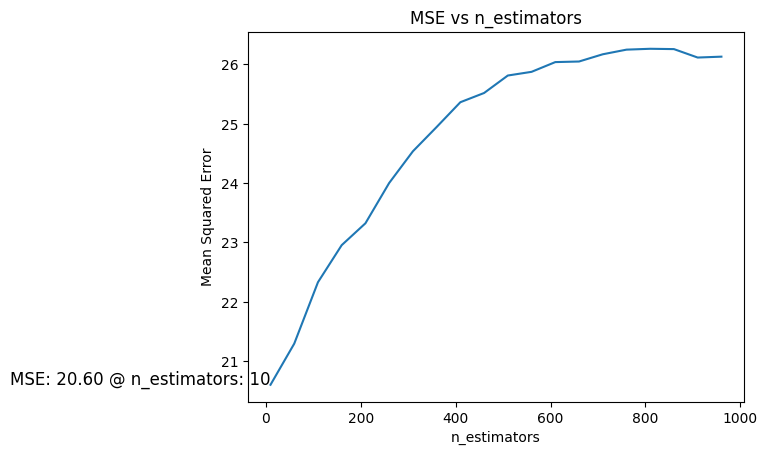

In [70]:
# Перебор параметров для Gradient Boosting Regressor
n_estimators_range = range(10, 1001, 50)
mse_scores = []

for n_estimators in n_estimators_range:
    reg = GradientBoostingRegressor(n_estimators=n_estimators, random_state=42)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Поиск лучшего значения n_estimators
best_index = np.argmin(mse_scores)
best_n_estimators = n_estimators_range[best_index]
best_mse = mse_scores[best_index]

# Визуализация
plt.plot(n_estimators_range, mse_scores)
plt.xlabel('n_estimators')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs n_estimators')
plt.text(best_n_estimators, best_mse, f'MSE: {best_mse:.2f} @ n_estimators: {best_n_estimators}', fontsize=12, ha='right')
plt.show()


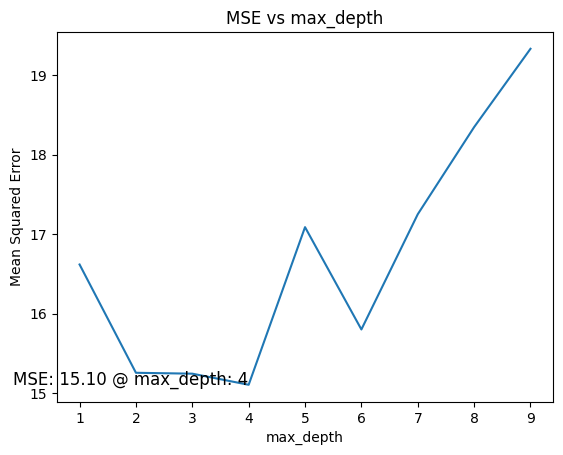

In [42]:
# Перебор параметров для Gradient Boosting Regressor
max_depth_range = range(1, 10)
mse_scores = []

for max_depth in max_depth_range:
    reg = GradientBoostingRegressor(n_estimators=60, max_depth=max_depth, random_state=42)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Поиск лучшего значения max_depth
best_index = np.argmin(mse_scores)
best_max_depth = max_depth_range[best_index]
best_mse = mse_scores[best_index]

# Визуализация
plt.plot(max_depth_range, mse_scores)
plt.xlabel('max_depth')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs max_depth')
plt.text(best_max_depth, best_mse, f'MSE: {best_mse:.2f} @ max_depth: {best_max_depth}', fontsize=12, ha='right')
plt.show()


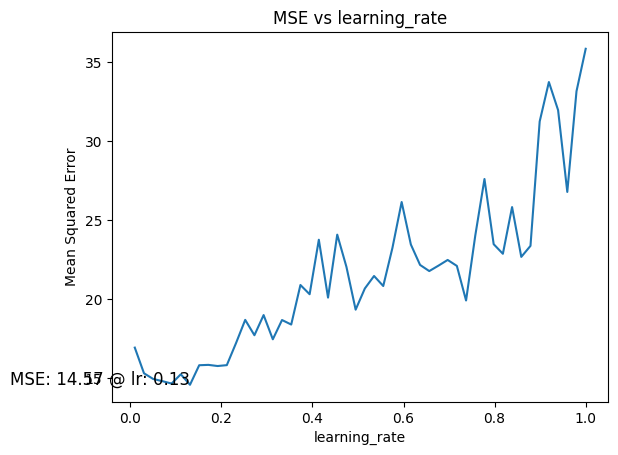

In [43]:
# 2. Перебор learning_rate
learning_rate_range = np.linspace(0.01, 1.0, 50)
mse_scores = []

for learning_rate in learning_rate_range:
    reg = GradientBoostingRegressor(n_estimators=60, max_depth=4, learning_rate=learning_rate, random_state=42)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Поиск лучшего значения learning_rate
best_index = np.argmin(mse_scores)
best_learning_rate = learning_rate_range[best_index]
best_mse = mse_scores[best_index]

# Визуализация
plt.plot(learning_rate_range, mse_scores)
plt.xlabel('learning_rate')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs learning_rate')
plt.text(best_learning_rate, best_mse, f'MSE: {best_mse:.2f} @ lr: {best_learning_rate:.2f}', fontsize=12, ha='right')
plt.show()

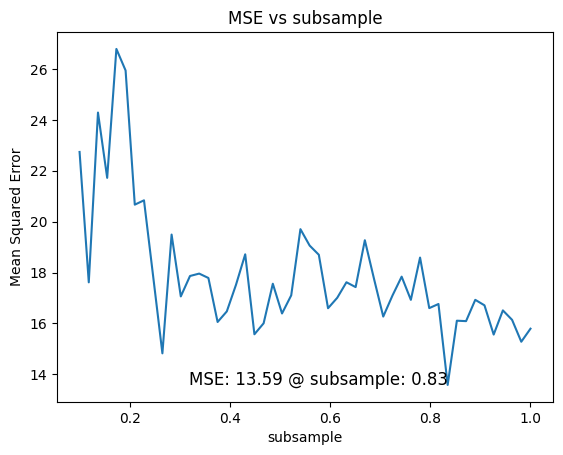

In [44]:
# 3. Перебор subsample
subsample_range = np.linspace(0.1, 1.0, 50)
mse_scores = []

for subsample in subsample_range:
    reg = GradientBoostingRegressor(n_estimators=60, max_depth=4, learning_rate=0.13, subsample=subsample, random_state=42)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Поиск лучшего значения subsample
best_index = np.argmin(mse_scores)
best_subsample = subsample_range[best_index]
best_mse = mse_scores[best_index]

# Визуализация
plt.plot(subsample_range, mse_scores)
plt.xlabel('subsample')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs subsample')
plt.text(best_subsample, best_mse, f'MSE: {best_mse:.2f} @ subsample: {best_subsample:.2f}', fontsize=12, ha='right')
plt.show()

In [45]:
# 4. Перебор loss
loss_values = ['squared_error', 'absolute_error', 'huber', 'quantile']
mse_scores = []

for loss in loss_values:
    reg = GradientBoostingRegressor(n_estimators=60, max_depth=4, learning_rate=0.13, loss=loss, subsample=0.83, random_state=42)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Поиск лучшего значения loss
best_index = np.argmin(mse_scores)
best_loss = loss_values[best_index]
best_mse = mse_scores[best_index]

print(f"Лучшее значение loss: {best_loss}, MSE: {best_mse:.4f}")

Лучшее значение loss: huber, MSE: 14.5844


In [46]:
# 5. Перебор max_features
max_features_values = [None, 'sqrt', 'log2', 0.5, 0.7]
mse_scores = []

for max_features in max_features_values:
    reg = GradientBoostingRegressor(n_estimators=60, max_depth=4, learning_rate=0.13, subsample=0.83, max_features=max_features, random_state=42)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Поиск лучшего значения max_features
best_index = np.argmin(mse_scores)
best_max_features = max_features_values[best_index]
best_mse = mse_scores[best_index]

print(f"Лучшее значение max_features: {best_max_features}, MSE: {best_mse:.4f}")

Лучшее значение max_features: None, MSE: 14.8914


In [47]:
# Итоговая модель с подобранными параметрами
final_model = GradientBoostingRegressor(n_estimators=60, max_depth=4, learning_rate=0.13, subsample=0.83, random_state=42)

final_model.fit(X_train, y_train)
final_y_pred = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_y_pred)

print(f"Итоговая MSE: {final_mse:.4f}")

Итоговая MSE: 14.8914


в итоге выбрана первая модель ridge регрессия